In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Import Data

In [3]:
import pandas as pd

original_data = pd.read_csv('ver_2_for_imputation_selected.csv')

## Drop Null Data

In [4]:
original_data.drop(original_data[original_data.d_dimer_num_diagnosis.isnull()].index, inplace=True)
original_data.head()

,Temp_No,Age,Sex,Death,Status,Cancer,Dur_Event_day,Dur_Censored_day,Surtime_day,Etiology,...,smoking,alcohol,Cortical_infarct,RoPE_score,RoPE_score_5_scale,Cancer.1,composite_coagulopathy,Plt_diagnosis,Hb_diagnosis,CRP_diagnosis
0,1,55,0,NaN,0,0,NaN,3170.0,3170,7,...,0,1,1,7,4,0,0,158.0,11.9,0.43
2,3,81,0,NaN,0,1,NaN,551.0,551,7,...,0,0,0,4,2,1,1,223.0,10.8,0.12
4,5,71,1,1.0,1,0,603.0,NaN,603,4,...,0,1,0,3,2,0,1,232.0,10.0,5.68
5,6,61,0,NaN,1,0,181.0,NaN,181,7,...,1,1,1,5,3,0,0,316.0,14.8,0.10
6,7,49,1,NaN,0,1,NaN,955.0,955,4,...,0,1,0,7,4,1,1,169.0,15.0,0.10


345


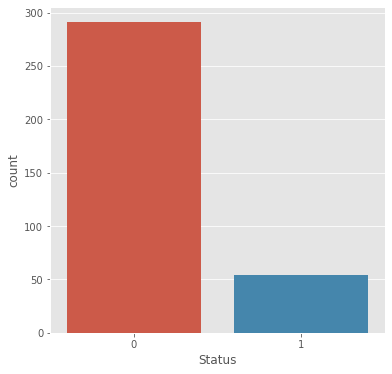

0    291
1     54
Name: Status, dtype: int64


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

print(len(original_data))

plt.figure(figsize=(6, 6))
sns.countplot(data=original_data, x=original_data.Status)
plt.show()

print(original_data.Status.value_counts())

# Kaplan-Meier Estimators

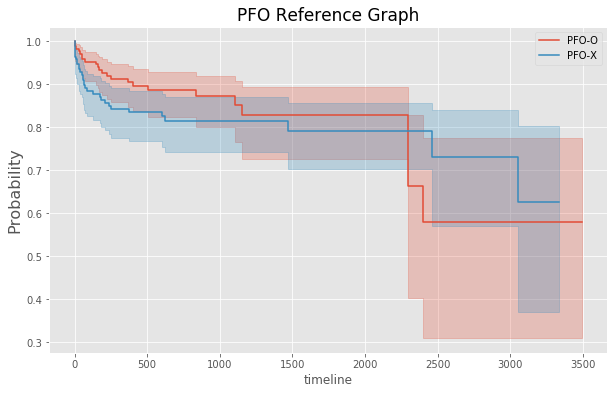

In [37]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

pfo_o = original_data[original_data.PFO_positive==1]
pfo_x = original_data[original_data.PFO_positive==0]

T0 = np.array(pfo_o['Surtime_day'], dtype=np.int32)
E0 = np.array(pfo_o['Status'], dtype=np.float32)
T1 = np.array(pfo_x['Surtime_day'], dtype=np.int32)
E1 = np.array(pfo_x['Status'], dtype=np.float32)

labels = ['PFO-O', 'PFO-X']

plt.style.use('ggplot')
kmf_pos = KaplanMeierFitter().fit(T0, event_observed=E0, label=labels[0])
kmf_neg = KaplanMeierFitter().fit(T1, event_observed=E1, label=labels[1])

plt.figure(figsize=(10, 6))
plt.title('PFO Reference Graph', fontsize=17)
kmf_pos.plot()
kmf_neg.plot()
plt.ylabel('Probability', fontsize=16)
plt.show()

# CoxPH

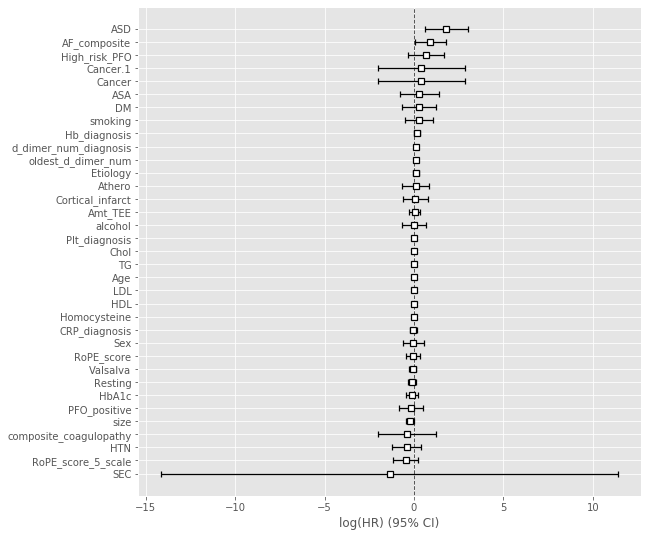

In [40]:
from lifelines import CoxPHFitter

cox = CoxPHFitter(penalizer=0.01)
cox.fit(original_data, duration_col='Surtime_day', event_col='Status')
plt.figure(figsize=(9, 9))
cox.plot()
plt.show()

In [41]:
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 345 total observations, 291 right-censored observations>
             duration col = 'Surtime_day'
                event col = 'Status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 345
number of events observed = 54
   partial log-likelihood = -260.76
         time fit was run = 2022-07-31 23:59:11 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
Age                     -0.00       1.00       0.02            -0.04             0.04                 0.96                 1.04
Sex                     -0.05       0.95       0.30            -0.63             0.53                 0.53                 1.70
Cancer                   0.40       1.50       1.24            -2.02             2.83                 0.13                16.94
Etiology                 0.11       1.11       0.08            -0.05             0.27                 0.95                 1.31
AF_composite             0.91       2.49       0.44             0.05             1.77                 1.05                 5.89
PFO_positive            -0.16       0.85       0.35            -0.84             0.51                 0.43                 1.67
size                    -0.20       0.82       0.11            -0.43             0.02                 0.65                 1.02
Amt_TEE                  0.03       1.03       0.15            -0.27             0.32                 0.77                 1.38
High_risk_PFO            0.66       1.94       0.51            -0.33             1.66                 0.72                 5.23
SEC                     -1.37       0.25       6.51           -14.13            11.39                 0.00             88648.47
ASD                      1.79       5.99       0.61             0.59             2.99                 1.80                19.91
ASA                      0.30       1.35       0.57            -0.81             1.42                 0.44                 4.13
Athero                   0.10       1.10       0.38            -0.65             0.85                 0.52                 2.34
Resting                 -0.12       0.89       0.12            -0.36             0.12                 0.70                 1.13
Valsalva                -0.09       0.92       0.10            -0.27             0.10                 0.76                 1.11
d_dimer_num_diagnosis    0.13       1.14       0.06             0.02             0.24                 1.02                 1.27
oldest_d_dimer_num       0.11       1.12       0.05             0.01             0.20                 1.01                 1.23
Homocysteine            -0.02       0.98       0.02            -0.07             0.02                 0.94                 1.02
HTN                     -0.42       0.66       0.41            -1.21             0.38                 0.30                 1.46
DM                       0.28       1.32       0.50            -0.70             1.25                 0.50                 3.51
HbA1c                   -0.12       0.89       0.17            -0.45             0.21                 0.64                 1.23
Chol                     0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
HDL                     -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
LDL                     -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
TG                       0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
smoking                  0.28       1.32       0.40            -0.52             1.07                 0.60         

# Log-Rank Test

In [12]:
from lifelines.statistics import logrank_test

logrank_test(pfo_o['d_dimer_num_diagnosis'], pfo_x['d_dimer_num_diagnosis'], pfo_o['Status'], pfo_x['Status']).p_value

0.44348734280828894

## Make Dataset

In [63]:
from sklearn.model_selection import train_test_split

data = original_data.drop(columns=['Surtime_day', 'Status'])
label = original_data[['Status', 'Surtime_day']].to_numpy()
label = [(status, survtime) for status, survtime in label]
label = np.array(label, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

x_train, x_test, y_train, y_test = train_test_split(
    data, label, test_size=0.2, random_state=42
)

## Cross Validation Score

In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sksurv.ensemble import RandomSurvivalForest, ExtraSurvivalTrees
import pandas as pd
import numpy as np
from xgbse import XGBSEKaplanNeighbors
from xgbse.converters import convert_to_structured
from xgbse.metrics import concordance_index
from sksurv.linear_model import CoxnetSurvivalAnalysis, CoxPHSurvivalAnalysis
from sksurv.svm import FastSurvivalSVM
from sksurv.preprocessing import OneHotEncoder
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sksurv.metrics import concordance_index_censored

X = original_data.drop(columns=['Surtime_day', 'Status'])
y = convert_to_structured(original_data.Surtime_day, original_data.Status)

In [22]:
%%time 

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rsf_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', RandomSurvivalForest(random_state=42))
])

cox_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis())
])

ridge_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis(alpha=0.6))
])

lasso_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01))
])

elastic_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, fit_baseline_model=True))
])

extra_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', ExtraSurvivalTrees(random_state=42))
])

fastsvm_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=42))
])

xgb_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', XGBSEKaplanNeighbors(n_neighbors=10))
])

feature = X.copy()
feature = np.array(feature)

acc_list = []

for train_idx, test_idx in skfold.split(feature, y):
    X_train, X_test = feature[train_idx], feature[test_idx]
    Y_train, Y_test = y[train_idx], y[test_idx]
    
    X_train = pd.DataFrame(data=X_train, columns=data.columns)
    X_test = pd.DataFrame(data=X_test, columns=data.columns)
    xgb_pipe.fit(X_train, Y_train)
    cindex = concordance_index(Y_test, xgb_pipe.predict(X_test))
    acc_list.append(cindex)
    
rsf_cindex = np.mean(cross_val_score(rsf_pipe, data, label, cv=skfold))
cox_cindex = np.mean(cross_val_score(cox_pipe, data, label, cv=skfold))
ridge_cindex = np.mean(cross_val_score(ridge_pipe, data, label, cv=skfold))
lasso_cindex = np.mean(cross_val_score(lasso_pipe, data, label, cv=skfold))
elastic_cindex = np.mean(cross_val_score(elastic_pipe, data, label, cv=skfold))
extra_cindex = np.mean(cross_val_score(extra_pipe, data, label, cv=skfold))
fastsvm_cindex = np.mean(cross_val_score(fastsvm_pipe, data, label, cv=skfold))
print('RF-Survival CV Mean C-index : ', np.round(rsf_cindex, 4))
print('CoxPH CV Mean C-index : ', np.round(cox_cindex, 4))
print('Ridge CV Mean C-index : ', np.round(ridge_cindex, 4))
print('Lasso CV Mean C-index : ', np.round(lasso_cindex, 4))
print('Elastic Net CV Mean C-index : ', np.round(elastic_cindex, 4))
print('ExtraTree CV Mean C-index : ', np.round(extra_cindex, 4))
print('FastSVM CV Mean C-index : ', np.round(fastsvm_cindex, 4))
print('XGB CV Mean C-index : ', np.round(np.mean(acc_list), 4))

RF-Survival CV Mean C-index :  0.5597
CoxPH CV Mean C-index :  nan
Ridge CV Mean C-index :  0.5934
Lasso CV Mean C-index :  0.6163
Elastic Net CV Mean C-index :  0.6152
ExtraTree CV Mean C-index :  0.5758
FastSVM CV Mean C-index :  0.5866
XGB CV Mean C-index :  0.488
CPU times: user 19min 12s, sys: 18.3 s, total: 19min 31s
Wall time: 1min


In [70]:
cox_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis(alpha=0.01))
])
cox_cindex = np.mean(cross_val_score(cox_pipe, data, label, cv=skfold))
print('CoxPH CV Mean C-index : ', np.round(cox_cindex, 4))

CoxPH CV Mean C-index :  0.6286


# Training Machine Learning

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sksurv.ensemble import RandomSurvivalForest, ExtraSurvivalTrees
from sksurv.linear_model import CoxnetSurvivalAnalysis, CoxPHSurvivalAnalysis
from sksurv.svm import FastSurvivalSVM
from sksurv.preprocessing import OneHotEncoder
from xgbse import XGBSEKaplanNeighbors
from xgbse.converters import convert_to_structured
from xgbse.metrics import concordance_index

x_train, x_test, y_train, y_test = train_test_split(
    data, label, test_size=0.2, random_state=42
)

X = original_data.drop(columns=['Surtime_day', 'Status'])
y = convert_to_structured(original_data.Surtime_day, original_data.Status)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rsf_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', RandomSurvivalForest(random_state=42))
]).fit(x_train, y_train)

cox_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis())
]).fit(x_train, y_train)

ridge_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis(alpha=0.6))
]).fit(x_train, y_train)

lasso_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01))
]).fit(x_train, y_train)

elastic_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01))
]).fit(x_train, y_train)

extra_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', ExtraSurvivalTrees(random_state=42))
]).fit(x_train, y_train)

fastsvm_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=42))
]).fit(x_train, y_train)

xgb_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', XGBSEKaplanNeighbors(n_neighbors=10))
]).fit(X_train, Y_train)

print('RSF C-index : ', np.round(rsf_pipe.score(x_test, y_test), 4))
print('Cox C-index : ', np.round(cox_pipe.score(x_test, y_test), 4))
print('Ridge C-index : ', np.round(ridge_pipe.score(x_test, y_test), 4))
print('Lasso C-index : ', np.round(lasso_pipe.score(x_test, y_test), 4))
print('Elastic C-index : ', np.round(fastsvm_pipe.score(x_test, y_test), 4))
print('Extra Tree C-index : ', np.round(extra_pipe.score(x_test, y_test), 4))
print('Fast SVM C-index : ', np.round(fastsvm_pipe.score(x_test, y_test), 4))
print('XGB C-index : ', np.round(concordance_index(Y_test, xgb_pipe.predict(X_test)), 4))

RSF C-index :  0.6403
Cox C-index :  0.6292
Ridge C-index :  0.6973
Lasso C-index :  0.6149
Elastic C-index :  0.6577
Extra Tree C-index :  0.626
Fast SVM C-index :  0.6577
XGB C-index :  0.4778


# Bayesian Optimization

In [243]:
%%time

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sksurv.metrics import concordance_index_censored

def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['Status'], y['Survival_in_days'], prediction)
    return result[0]

search_space = {
    "bootstrap":Categorical([True, False]),
    "max_depth":Integer(6, 50),
    "max_features":Categorical(['auto', 'sqrt', 'log2']),
    "min_samples_leaf":Integer(2, 30),
    "min_samples_split":Integer(2, 30),
    "n_estimators":Integer(100, 1000)
    }

rsf_bayes_search = BayesSearchCV(estimator=RandomSurvivalForest(random_state=42), 
                                 search_spaces=search_space, scoring=score_survival_model,
                                 n_iter=100, n_jobs=-1, cv=5, verbose=0)
rsf_bayes_search.fit(x_train, y_train)

rsf_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', RandomSurvivalForest(**rsf_bayes_search.best_params_))
]).fit(x_train, y_train)

print("Best Parameters RSF C-index : ", np.round(rsf_pipe.score(x_test, y_test), 4))

Best Parameters RSF C-index :  0.6418
CPU times: user 29min 9s, sys: 36.5 s, total: 29min 46s
Wall time: 5min 57s


In [118]:
%%time

search_space = {
    'alpha' : Real(0.1, 2.0),
    'ties' : Categorical(['breslow', 'efron']),
    'n_iter' : Integer(100, 1000),
    'tol' : Categorical([1e-7, 1e-8, 1e-9, 1e-10, 1e-11])
}

ridge_bayes_search = BayesSearchCV(estimator=CoxPHSurvivalAnalysis(),
                                  search_spaces=search_space, scoring=score_survival_model,
                                  n_iter=300, n_jobs=-1, cv=5, verbose=0).fit(x_train, y_train)
ridge_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis(**ridge_bayes_search.best_params_))
]).fit(x_train, y_train)

print("Best Parameters Ridge C-index : ", np.round(ridge_pipe.score(x_test, y_test), 4))

Best Parameters Ridge C-index :  0.7116
CPU times: user 3h 1min 44s, sys: 4min 8s, total: 3h 5min 52s
Wall time: 35min 47s


In [119]:
%%time 

search_space = {
    'l1_ratio' : Real(0.1, 1.0),
}

lasso_bayes_search = BayesSearchCV(estimator=CoxnetSurvivalAnalysis(alpha_min_ratio=0.01),
                                  search_spaces=search_space, scoring=score_survival_model,
                                  n_iter=100, n_jobs=-1, cv=5, verbose=0).fit(x_train, y_train)

lasso_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxnetSurvivalAnalysis(**lasso_bayes_search.best_params_))
]).fit(x_train, y_train)

print('Best Parameters Lasso C-index : ', np.round(lasso_pipe.score(x_test, y_test), 4))

Best Parameters Lasso C-index :  0.6989
CPU times: user 15min 5s, sys: 18.8 s, total: 15min 24s
Wall time: 1min 35s


In [120]:
%%time

search_space = {
    "bootstrap":Categorical([True, False]),
    "max_depth":Integer(6, 50),
    "max_features":Categorical(['auto', 'sqrt', 'log2']),
    "min_samples_leaf":Integer(2, 30),
    "min_samples_split":Integer(2, 30),
    "n_estimators":Integer(100, 1000)
    }

extra_bayes_search = BayesSearchCV(estimator=ExtraSurvivalTrees(random_state=42), 
                                 search_spaces=search_space, scoring=score_survival_model,
                                 n_iter=100, n_jobs=-1, cv=5, verbose=0)
extra_bayes_search.fit(x_train, y_train)

extra_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', ExtraSurvivalTrees(**extra_bayes_search.best_params_))
]).fit(x_train, y_train)

print("Best Parameters Extra Tree C-index : ", np.round(extra_pipe.score(x_test, y_test), 4))

Best Parameters Extra Tree C-index :  0.6149
CPU times: user 26min 50s, sys: 33.7 s, total: 27min 24s
Wall time: 3min 59s


## Feature Importance

In [121]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt

perm = PermutationImportance(rsf_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### RSF Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### RSF Feature importance


Weight,Feature
0.0499 ± 0.0430,Homocysteine
0.0473 ± 0.0415,RoPE_score
0.0136 ± 0.0476,CRP_diagnosis
0.0127 ± 0.0204,size
0.0125 ± 0.0216,HTN
0.0064 ± 0.0269,Plt_diagnosis
0.0058 ± 0.0395,oldest_d_dimer_num
0.0056 ± 0.0222,Age
0.0051 ± 0.0063,Cancer.1
0.0050 ± 0.0094,Sex


In [122]:
perm = PermutationImportance(ridge_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### Ridge Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### Ridge Feature importance


Weight,Feature
0.1874 ± 0.1195,RoPE_score
0.0814 ± 0.0656,RoPE_score_5_scale
0.0663 ± 0.0795,Homocysteine
0.0419 ± 0.0410,Cortical_infarct
0.0368 ± 0.0738,size
0.0281 ± 0.0178,composite_coagulopathy
0.0257 ± 0.0401,Plt_diagnosis
0.0209 ± 0.0482,PFO_positive
0.0168 ± 0.0227,High_risk_PFO
0.0151 ± 0.0329,Amt_TEE


In [123]:
perm = PermutationImportance(lasso_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### Lasso Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### Lasso Feature importance


Weight,Feature
0.2124 ± 0.1275,RoPE_score
0.0745 ± 0.0689,RoPE_score_5_scale
0.0476 ± 0.0763,Homocysteine
0.0458 ± 0.0570,Cortical_infarct
0.0219 ± 0.0769,size
0.0190 ± 0.0522,PFO_positive
0.0147 ± 0.0173,composite_coagulopathy
0.0080 ± 0.0419,Plt_diagnosis
0.0077 ± 0.0276,AF_composite
0.0066 ± 0.0360,High_risk_PFO


In [124]:
perm = PermutationImportance(fastsvm_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### SVM Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### SVM Feature importance


Weight,Feature
0.2450 ± 0.1300,RoPE_score
0.0545 ± 0.0625,Cortical_infarct
0.0473 ± 0.0761,Homocysteine
0.0439 ± 0.0425,RoPE_score_5_scale
0.0363 ± 0.0285,AF_composite
0.0241 ± 0.0841,size
0.0171 ± 0.0426,d_dimer_num_diagnosis
0.0132 ± 0.0569,PFO_positive
0.0097 ± 0.0080,composite_coagulopathy
0.0077 ± 0.0349,ASA


In [125]:
perm = PermutationImportance(extra_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### Extra Tree Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### Extra Tree Feature importance


Weight,Feature
0.0455 ± 0.0623,HTN
0.0296 ± 0.0344,AF_composite
0.0183 ± 0.0349,composite_coagulopathy
0.0148 ± 0.0209,smoking
0.0145 ± 0.0238,RoPE_score
0.0105 ± 0.0397,Cortical_infarct
0.0102 ± 0.0216,size
0.0084 ± 0.0272,RoPE_score_5_scale
0.0047 ± 0.0319,oldest_d_dimer_num
0.0035 ± 0.0187,CRP_diagnosis


# Plot Dynamic AUC

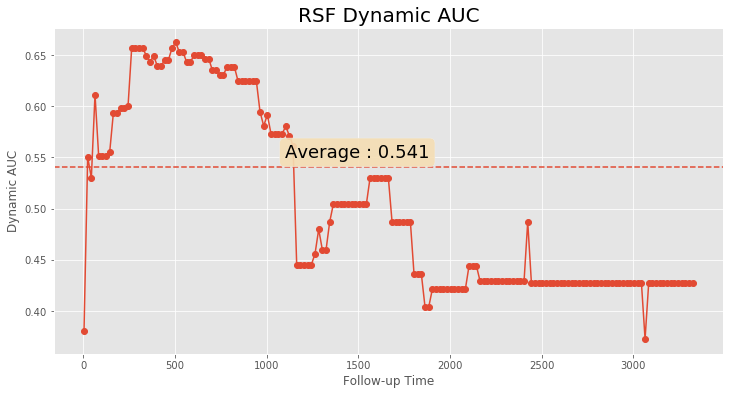

In [23]:
from sksurv.metrics import cumulative_dynamic_auc

plt.style.use('ggplot')
va_times = np.arange(4, 3331, 20)

risk_scores = rsf_pipe.predict(x_test)

auc, mean_auc = cumulative_dynamic_auc(
    y_train, y_test, risk_scores, va_times
)

plt.figure(figsize=(12, 6))
plt.plot(va_times, auc, marker='o')
plt.axhline(mean_auc, linestyle='--')
plt.title('RSF Dynamic AUC', fontsize=20)
plt.xlabel('Follow-up Time')
plt.ylabel('Dynamic AUC')

textbox = 'Average : {:.3f}'.format(mean_auc)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
plt.text(1100, 0.55, textbox, fontsize=18, bbox=props)
plt.grid(True)

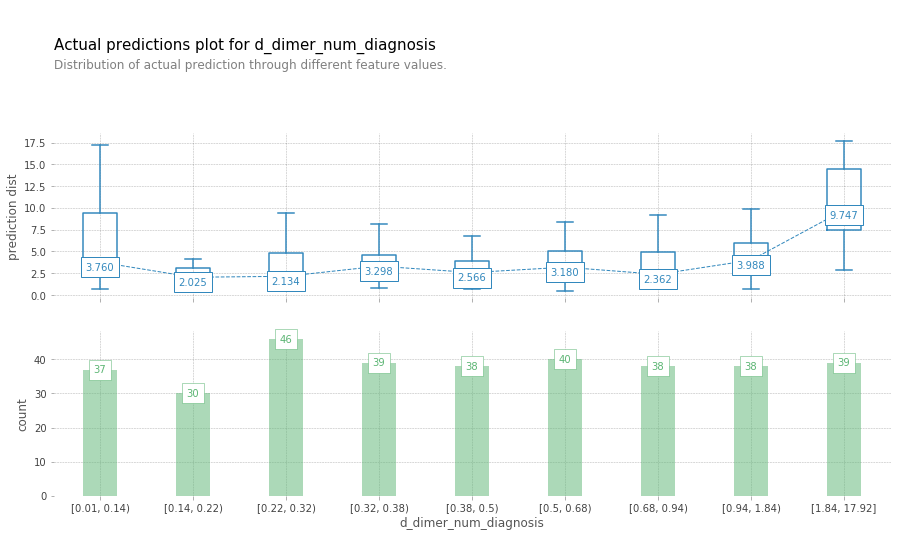

In [18]:
from pdpbox import pdp, info_plots
from pdpbox.pdp import pdp_isolate, pdp_plot

fig, axes, summary_df = info_plots.actual_plot(
    model=rsf_pipe,
    X=original_data.drop(columns=['Status', 'Surtime_day']),
    feature='d_dimer_num_diagnosis',
    feature_name='d_dimer_num_diagnosis',
    predict_kwds={}
)

# Feature Selection

### Univariate

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
#Univariate
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(data, label)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 460
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     345 non-null    int64  
 1   Sex                     345 non-null    int64  
 2   Cancer                  345 non-null    int64  
 3   Etiology                345 non-null    int64  
 4   AF_composite            345 non-null    int64  
 5   PFO_positive=Positive   345 non-null    float64
 6   size                    345 non-null    float64
 7   Amt_TEE                 345 non-null    float64
 8   High_risk_PFO           345 non-null    int64  
 9   SEC                     345 non-null    int64  
 10  ASD                     345 non-null    int64  
 11  ASA                     345 non-null    int64  
 12  Athero                  345 non-null    float64
 13  Resting                 345 non-null    int64  
 14  Valsalva                345 non-null    in

# PFO_Positive Data

In [71]:
data = pfo_o.drop(columns=['Surtime_day', 'Status'])
label = pfo_o[['Status', 'Surtime_day']].to_numpy()
label = [(status, survtime) for status, survtime in label]
label = np.array(label, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

x_train, x_test, y_train, y_test = train_test_split(
    data, label, test_size=0.2, random_state=42
)

X = pfo_o.drop(columns=['Surtime_day', 'Status'])
y = convert_to_structured(pfo_o.Surtime_day, original_data.Status)

In [48]:
pfo_o

,Age,Sex,Status,Cancer,Surtime_day,Etiology,AF_composite,PFO_positive,size,Amt_TEE,...,smoking,alcohol,Cortical_infarct,RoPE_score,RoPE_score_5_scale,Cancer.1,composite_coagulopathy,Plt_diagnosis,Hb_diagnosis,CRP_diagnosis
5,84,1,0,1,232,7,0,1,0.000000,0,...,0,0,0,3,2,1,1,196.0,12.8,0.10
6,83,0,0,0,1630,7,0,1,5.839606,0,...,0,0,1,4,2,0,0,318.0,12.3,0.74
7,83,1,0,0,3493,7,0,1,4.900000,3,...,0,0,1,5,3,0,1,234.0,12.7,0.12
8,83,0,0,0,11,3,0,1,1.900000,2,...,0,0,0,3,2,0,0,198.0,13.3,0.10
9,82,1,0,0,596,7,0,1,0.000000,0,...,0,0,1,4,2,0,0,298.0,10.2,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,21,1,0,0,470,4,0,1,2.610489,2,...,0,0,0,9,5,0,0,293.0,17.2,0.10
453,21,1,0,0,498,7,0,1,5.100000,3,...,0,0,0,9,5,0,0,295.0,13.7,0.10
456,19,1,0,0,509,7,0,1,2.000000,3,...,0,0,0,9,5,0,0,280.0,17.5,0.89
458,19,1,0,0,548,7,0,1,0.000000,0,...,0,0,0,9,5,0,0,281.0,14.3,0.19


In [74]:
cox_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis(alpha=0.00001))
])
cox_cindex = np.mean(cross_val_score(cox_pipe, data, label, cv=skfold))
print('CoxPH CV Mean C-index : ', np.round(cox_cindex, 4))

CoxPH CV Mean C-index :  0.5561


In [26]:
%%time 

skfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

rsf_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', RandomSurvivalForest(random_state=42))
])

cox_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis())
])

ridge_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis(alpha=0.6))
])

lasso_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01))
])

elastic_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, fit_baseline_model=True))
])

extra_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', ExtraSurvivalTrees(random_state=42))
])

fastsvm_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=42))
])

xgb_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', XGBSEKaplanNeighbors(n_neighbors=10))
])

feature = X.copy()
feature = np.array(feature)

acc_list = []

for train_idx, test_idx in skfold.split(feature, y):
    X_train, X_test = feature[train_idx], feature[test_idx]
    Y_train, Y_test = y[train_idx], y[test_idx]
    
    X_train = pd.DataFrame(data=X_train, columns=data.columns)
    X_test = pd.DataFrame(data=X_test, columns=data.columns)
    xgb_pipe.fit(X_train, Y_train)
    cindex = concordance_index(Y_test, xgb_pipe.predict(X_test))
    acc_list.append(cindex)
    
rsf_cindex = np.mean(cross_val_score(rsf_pipe, data, label, cv=skfold))
cox_cindex = np.mean(cross_val_score(cox_pipe, data, label, cv=skfold))
ridge_cindex = np.mean(cross_val_score(ridge_pipe, data, label, cv=skfold))
lasso_cindex = np.mean(cross_val_score(lasso_pipe, data, label, cv=skfold))
elastic_cindex = np.mean(cross_val_score(elastic_pipe, data, label, cv=skfold))
extra_cindex = np.mean(cross_val_score(extra_pipe, data, label, cv=skfold))
fastsvm_cindex = np.mean(cross_val_score(fastsvm_pipe, data, label, cv=skfold))
print('RF-Survival CV Mean C-index : ', np.round(rsf_cindex, 4))
print('CoxPH CV Mean C-index : ', np.round(cox_cindex, 4))
print('Ridge CV Mean C-index : ', np.round(ridge_cindex, 4))
print('Lasso CV Mean C-index : ', np.round(lasso_cindex, 4))
print('Elastic Net CV Mean C-index : ', np.round(elastic_cindex, 4))
print('ExtraTree CV Mean C-index : ', np.round(extra_cindex, 4))
print('FastSVM CV Mean C-index : ', np.round(fastsvm_cindex, 4))
print('XGB CV Mean C-index : ', np.round(np.mean(acc_list), 4))

RF-Survival CV Mean C-index :  0.6108
CoxPH CV Mean C-index :  nan
Ridge CV Mean C-index :  0.6005
Lasso CV Mean C-index :  0.6698
Elastic Net CV Mean C-index :  0.6696
ExtraTree CV Mean C-index :  0.5654
FastSVM CV Mean C-index :  0.5668
XGB CV Mean C-index :  0.5
CPU times: user 7min 31s, sys: 4.24 s, total: 7min 35s
Wall time: 23.3 s


In [147]:
rsf_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', RandomSurvivalForest(random_state=42))
]).fit(x_train, y_train)

ridge_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis(alpha=0.6))
]).fit(x_train, y_train)

lasso_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01))
]).fit(x_train, y_train)

elastic_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01))
]).fit(x_train, y_train)

extra_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', ExtraSurvivalTrees(random_state=42))
]).fit(x_train, y_train)

fastsvm_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=42))
]).fit(x_train, y_train)

xgb_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', XGBSEKaplanNeighbors(n_neighbors=10))
]).fit(X_train, Y_train)

print('RSF C-index : ', np.round(rsf_pipe.score(x_test, y_test), 4))
print('Ridge C-index : ', np.round(ridge_pipe.score(x_test, y_test), 4))
print('Lasso C-index : ', np.round(lasso_pipe.score(x_test, y_test), 4))
print('Elastic C-index : ', np.round(fastsvm_pipe.score(x_test, y_test), 4))
print('Extra Tree C-index : ', np.round(extra_pipe.score(x_test, y_test), 4))
print('Fast SVM C-index : ', np.round(fastsvm_pipe.score(x_test, y_test), 4))
print('XGB C-index : ', np.round(concordance_index(Y_test, xgb_pipe.predict(X_test)), 4))

RSF C-index :  0.551
Ridge C-index :  0.6327
Lasso C-index :  0.4898
Elastic C-index :  0.6122
Extra Tree C-index :  0.6735
Fast SVM C-index :  0.6122
XGB C-index :  0.5


## Bayesian Optimization

In [28]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sksurv.metrics import concordance_index_censored
import eli5
from eli5.sklearn import PermutationImportance
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sklearn.pipeline import Pipeline
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import ExtraSurvivalTrees, RandomSurvivalForest

def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['Status'], y['Survival_in_days'], prediction)
    return result[0]

2022-07-28 17:07:10.698519: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [31]:
%%time

search_space = {
    "bootstrap":Categorical([True, False]),
    "max_depth":Integer(6, 50),
    "max_features":Categorical(['auto', 'sqrt', 'log2']),
    "min_samples_leaf":Integer(2, 30),
    "min_samples_split":Integer(2, 30),
    "n_estimators":Integer(100, 1000)
    }

rsf_bayes_search = BayesSearchCV(estimator=RandomSurvivalForest(random_state=42), 
                                 search_spaces=search_space, scoring=score_survival_model,
                                 n_iter=100, n_jobs=-1, cv=skfold, verbose=0)
rsf_bayes_search.fit(x_train, y_train)

rsf_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', RandomSurvivalForest(**rsf_bayes_search.best_params_))
])#.fit(x_train, y_train)

#print("Best Parameters RSF C-index : ", np.round(rsf_pipe.score(x_test, y_test), 4))

CPU times: user 28min 44s, sys: 41.3 s, total: 29min 25s
Wall time: 3min 41s


In [32]:
rsf_cindex = np.mean(cross_val_score(rsf_pipe, data, label, cv=skfold))
print('RF-Survival CV Mean C-index : ', np.round(rsf_cindex, 4))

RF-Survival CV Mean C-index :  0.5974


In [75]:
%%time

search_space = {
    'alpha' : Real(0.1, 2.0),
    'ties' : Categorical(['breslow', 'efron']),
    'n_iter' : Integer(100, 1000),
    'tol' : Categorical([1e-7, 1e-8, 1e-9, 1e-10, 1e-11])
}

#ridge_bayes_search = BayesSearchCV(estimator=CoxPHSurvivalAnalysis(),
#                                  search_spaces=search_space, scoring=score_survival_model,
#                                  n_iter=300, n_jobs=-1, cv=5, verbose=0).fit(x_train, y_train)
ridge_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', CoxPHSurvivalAnalysis(**ridge_bayes_search.best_params_))
]).fit(x_train, y_train)

print("Best Parameters Ridge C-index : ", np.round(ridge_pipe.score(x_test, y_test), 4))

Best Parameters Ridge C-index :  0.6122
CPU times: user 25.4 ms, sys: 31 µs, total: 25.5 ms
Wall time: 23.5 ms


In [139]:
%%time

search_space = {
    "bootstrap":Categorical([True, False]),
    "max_depth":Integer(6, 50),
    "max_features":Categorical(['auto', 'sqrt', 'log2']),
    "min_samples_leaf":Integer(2, 30),
    "min_samples_split":Integer(2, 30),
    "n_estimators":Integer(100, 1000)
    }

extra_bayes_search = BayesSearchCV(estimator=ExtraSurvivalTrees(random_state=42), 
                                 search_spaces=search_space, scoring=score_survival_model,
                                 n_iter=100, n_jobs=-1, cv=5, verbose=0)
extra_bayes_search.fit(x_train, y_train)

extra_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', ExtraSurvivalTrees(**extra_bayes_search.best_params_))
]).fit(x_train, y_train)

print("Best Parameters Extra Tree C-index : ", np.round(extra_pipe.score(x_test, y_test), 4))

Best Parameters Extra Tree C-index :  0.6327
CPU times: user 24min 51s, sys: 31.3 s, total: 25min 22s
Wall time: 3min 15s


## Feature Importance

In [77]:
perm = PermutationImportance(rsf_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### RSF Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### RSF Feature importance


Weight,Feature
0.0929 ± 0.0805,d_dimer_num_diagnosis
0.0767 ± 0.1872,RoPE_score
0.0257 ± 0.0286,Amt_TEE
0.0124 ± 0.0408,Homocysteine
0.0107 ± 0.0743,HbA1c
0.0022 ± 0.0128,composite_coagulopathy
0.0009 ± 0.0411,HDL
0.0005 ± 0.0214,DM
0 ± 0.0000,AF_composite
0 ± 0.0000,PFO_positive


In [78]:
perm = PermutationImportance(ridge_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### Ridge Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### Ridge Feature importance


Weight,Feature
0.1994 ± 0.0896,d_dimer_num_diagnosis
0.0518 ± 0.1919,RoPE_score
0.0371 ± 0.0627,Homocysteine
0.0258 ± 0.0697,size
0.0156 ± 0.0173,Sex
0.0146 ± 0.0520,Amt_TEE
0.0127 ± 0.1174,LDL
0.0095 ± 0.0430,composite_coagulopathy
0.0080 ± 0.0254,Valsalva
0.0033 ± 0.0301,ASA


In [79]:
perm = PermutationImportance(extra_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### ExtraTree Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### ExtraTree Feature importance


Weight,Feature
0.0748 ± 0.0623,composite_coagulopathy
0.0444 ± 0.0287,d_dimer_num_diagnosis
0.0412 ± 0.0396,RoPE_score_5_scale
0.0390 ± 0.0893,DM
0.0345 ± 0.0444,RoPE_score
0.0329 ± 0.0408,High_risk_PFO
0.0309 ± 0.0351,Resting
0.0298 ± 0.0371,oldest_d_dimer_num
0.0224 ± 0.0319,Homocysteine
0.0210 ± 0.0227,CRP_diagnosis


In [135]:
perm = PermutationImportance(elastic_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### ElasticNet Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### ElasticNet Feature importance


Weight,Feature
0.0961 ± 0.2303,RoPE_score
0.0422 ± 0.1137,Homocysteine
0.0087 ± 0.1734,LDL
0.0021 ± 0.0132,d_dimer_num_diagnosis
0 ± 0.0000,Etiology
0 ± 0.0000,AF_composite
0 ± 0.0000,PFO_positive
0 ± 0.0000,size
0 ± 0.0000,Amt_TEE
0 ± 0.0000,High_risk_PFO


In [136]:
perm = PermutationImportance(fastsvm_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### FastSVM Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### FastSVM Feature importance


Weight,Feature
0.3698 ± 0.1352,d_dimer_num_diagnosis
0.0571 ± 0.0907,Sex
0.0330 ± 0.0595,Homocysteine
0.0276 ± 0.0976,size
0.0201 ± 0.0350,Amt_TEE
0.0152 ± 0.0478,composite_coagulopathy
0.0139 ± 0.1144,LDL
0.0123 ± 0.0883,ASA
0.0061 ± 0.0255,Valsalva
0.0058 ± 0.0910,RoPE_score


### Dynamic AUC

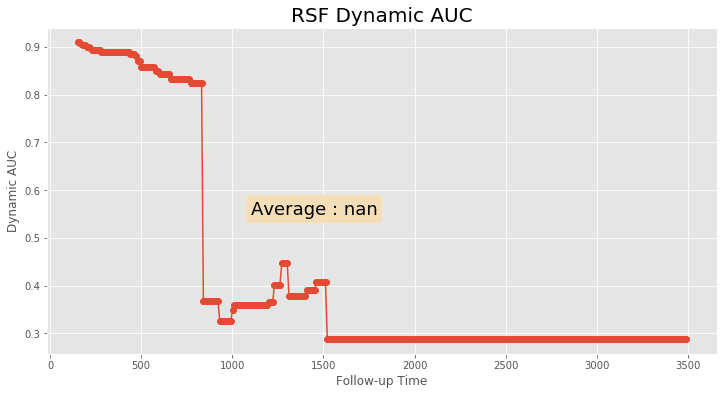

In [161]:
from sksurv.metrics import cumulative_dynamic_auc

plt.style.use('ggplot')
va_times = np.arange(51, 3493, 10)

risk_scores = rsf_pipe.predict(x_test)

auc, mean_auc = cumulative_dynamic_auc(
    y_train, y_test, risk_scores, va_times
)

plt.figure(figsize=(12, 6))
plt.plot(va_times, auc, marker='o')
plt.axhline(mean_auc, linestyle='--')
plt.title('RSF Dynamic AUC', fontsize=20)
plt.xlabel('Follow-up Time')
plt.ylabel('Dynamic AUC')

textbox = 'Average : {:.3f}'.format(mean_auc)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
plt.text(1100, 0.55, textbox, fontsize=18, bbox=props)
plt.grid(True)

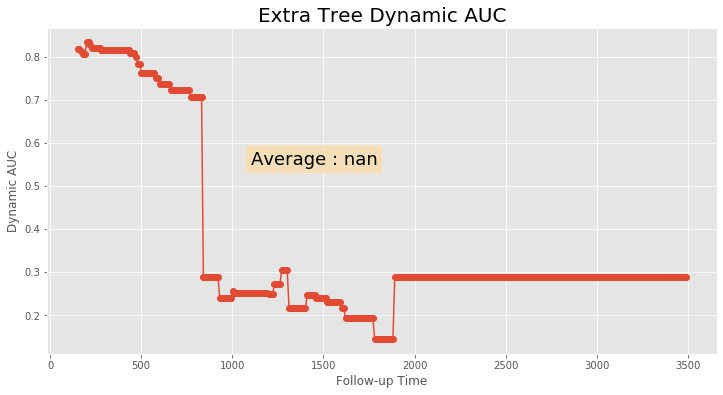

In [82]:
risk_scores = extra_pipe.predict(x_test)

auc, mean_auc = cumulative_dynamic_auc(
    y_train, y_test, risk_scores, va_times
)

plt.figure(figsize=(12, 6))
plt.plot(va_times, auc, marker='o')
plt.axhline(mean_auc, linestyle='--')
plt.title('Extra Tree Dynamic AUC', fontsize=20)
plt.xlabel('Follow-up Time')
plt.ylabel('Dynamic AUC')

textbox = 'Average : {:.3f}'.format(mean_auc)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
plt.text(1100, 0.55, textbox, fontsize=18, bbox=props)
plt.grid(True)

In [ ]:
risk_scores = ridge_pipe.predict(x_test)

auc, mean_auc = cumulative_dynamic_auc(
    y_train, y_test, risk_scores, va_times
)

plt.figure(figsize=(12, 6))
plt.plot(va_times, auc, marker='o')
plt.axhline(mean_auc, linestyle='--')
plt.title('RSF Dynamic AUC', fontsize=20)
plt.xlabel('Follow-up Time')
plt.ylabel('Dynamic AUC')

textbox = 'Average : {:.3f}'.format(mean_auc)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
plt.text(1100, 0.55, textbox, fontsize=18, bbox=props)
plt.grid(True)

In [ ]:
risk_scores = extra_pipe.predict(x_test)

auc, mean_auc = cumulative_dynamic_auc(
    y_train, y_test, risk_scores, va_times
)

plt.figure(figsize=(12, 6))
plt.plot(va_times, auc, marker='o')
plt.axhline(mean_auc, linestyle='--')
plt.title('RSF Dynamic AUC', fontsize=20)
plt.xlabel('Follow-up Time')
plt.ylabel('Dynamic AUC')

textbox = 'Average : {:.3f}'.format(mean_auc)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
plt.text(1100, 0.55, textbox, fontsize=18, bbox=props)
plt.grid(True)

## Calibration Curve

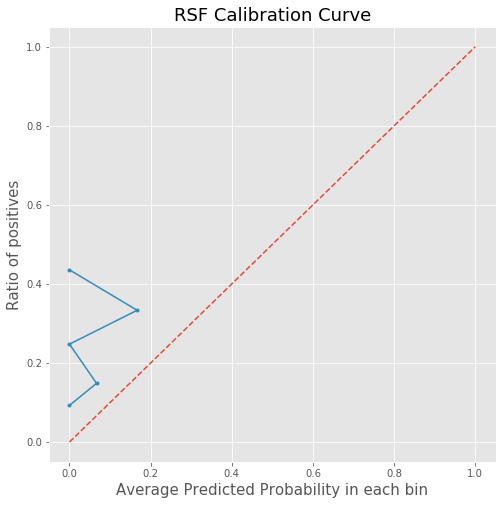

In [320]:
from sklearn.calibration import calibration_curve

rsf_pred = rsf_pipe.predict_survival_function(x_test)

rsf_surv_prob = np.row_stack([
    fn(1500)
    for fn in rsf_pred
])

y_true = y_test.copy()
y_pred = rsf_surv_prob.copy()
fop, mpv = calibration_curve(y_true['Status'], y_pred, n_bins=10)
plt.title('RSF Calibration Curve', fontsize=18)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fop, 1-mpv, marker='.')
plt.rcParams['figure.figsize']=(8, 8)
plt.ylabel('Ratio of positives', fontsize=15)
plt.xlabel('Average Predicted Probability in each bin', fontsize=15)
plt.show()

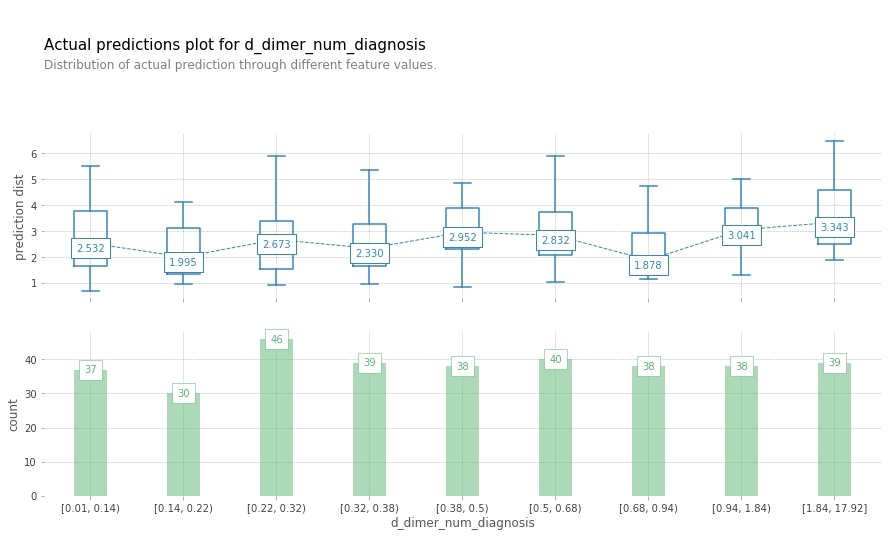

In [80]:
fig, axes, summary_df = info_plots.actual_plot(
    model=rsf_pipe,
    X=original_data.drop(columns=['Status', 'Surtime_day']),
    feature='d_dimer_num_diagnosis',
    feature_name='d_dimer_num_diagnosis',
    predict_kwds={}
)

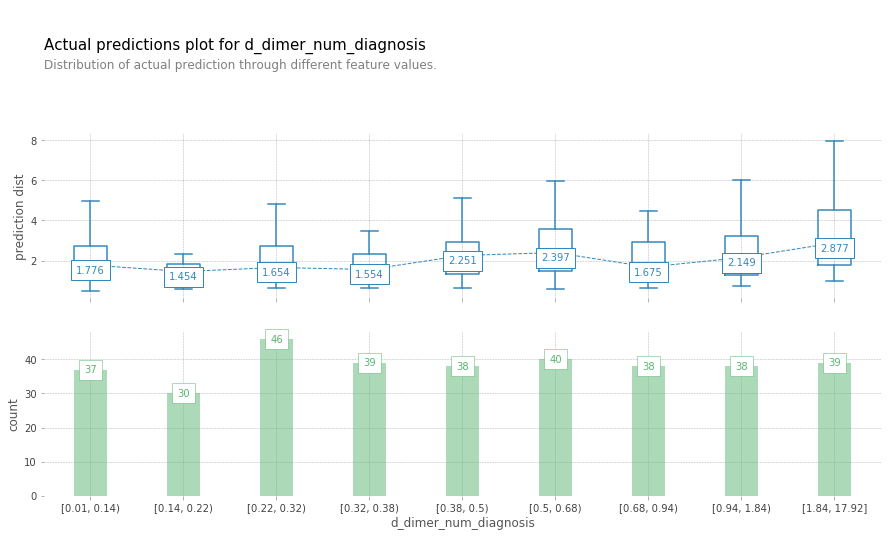

In [176]:
fig, axes, summary_df = info_plots.actual_plot(
    model=extra_pipe,
    X=original_data.drop(columns=['Status', 'Surtime_day']),
    feature='d_dimer_num_diagnosis',
    feature_name='d_dimer_num_diagnosis',
    predict_kwds={}
)

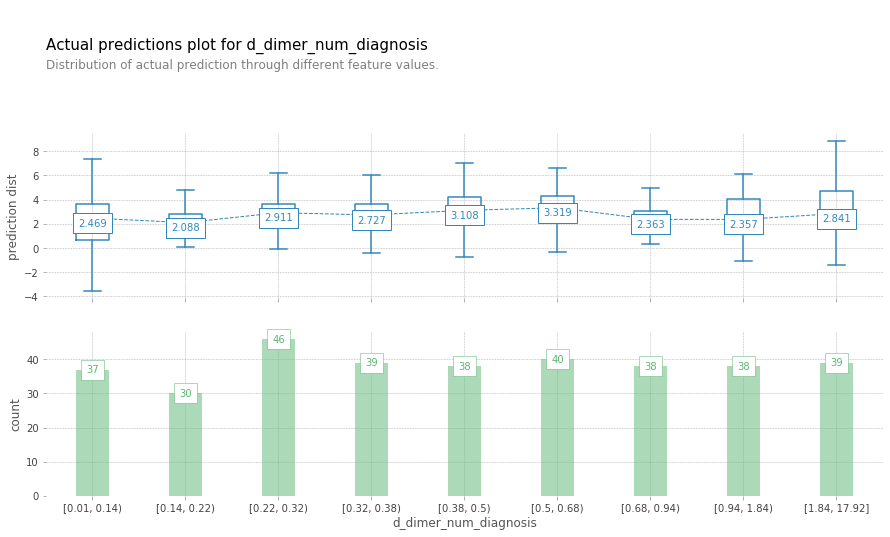

In [177]:
fig, axes, summary_df = info_plots.actual_plot(
    model=ridge_pipe,
    X=original_data.drop(columns=['Status', 'Surtime_day']),
    feature='d_dimer_num_diagnosis',
    feature_name='d_dimer_num_diagnosis',
    predict_kwds={}
)

## Under Sampling

In [214]:
from imblearn.under_sampling import RandomUnderSampler

data = pfo_o.drop(columns=['Status'])
label = pfo_o.Status

sampler = RandomUnderSampler()
data_resample, label_resample = sampler.fit_resample(data, label)

In [231]:
data = data_resample.drop(columns=['Surtime_day'])
label = pd.DataFrame(data=label_resample, columns=['Status'])
label['Surtime_day'] = data_resample.Surtime_day
label = label[['Status', 'Surtime_day']].to_numpy()
label = [(status, survtime) for status, survtime in label]
label = np.array(label, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

x_train, x_test, y_train, y_test = train_test_split(
    data, label, test_size=0.2, random_state=42
)

In [232]:
%%time

search_space = {
    "bootstrap":Categorical([True, False]),
    "max_depth":Integer(6, 50),
    "max_features":Categorical(['auto', 'sqrt', 'log2']),
    "min_samples_leaf":Integer(2, 30),
    "min_samples_split":Integer(2, 30),
    "n_estimators":Integer(100, 1000)
    }

rsf_bayes_search = BayesSearchCV(estimator=RandomSurvivalForest(random_state=42), 
                                 search_spaces=search_space, scoring=score_survival_model,
                                 n_iter=100, n_jobs=-1, cv=5, verbose=0)
rsf_bayes_search.fit(x_train, y_train)

rsf_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    ('model', RandomSurvivalForest(**rsf_bayes_search.best_params_))
]).fit(x_train, y_train)

print("Best Parameters RSF C-index : ", np.round(rsf_pipe.score(x_test, y_test), 4))

Best Parameters RSF C-index :  0.4444
CPU times: user 28min 50s, sys: 36 s, total: 29min 26s
Wall time: 3min 33s


In [233]:
perm = PermutationImportance(rsf_pipe, scoring=score_survival_model, n_iter=200, random_state=42)
perm.fit(x_test, y_test)

print('### RSF Feature importance')
eli5.show_weights(perm, feature_names=data.columns.tolist())

### RSF Feature importance


Weight,Feature
0.0111 ± 0.0412,Plt_diagnosis
0.0012 ± 0.0325,TG
0 ± 0.0000,AF_composite
0 ± 0.0000,PFO_positive
0 ± 0.0000,size
0 ± 0.0000,Amt_TEE
0 ± 0.0000,High_risk_PFO
0 ± 0.0000,SEC
0 ± 0.0000,ASD
0 ± 0.0000,smoking
